In [1]:
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Constants
from lib.mmsbm import MMSBM

train = "train.csv"
test = "test.csv"
sampling = 1
# Number of groups of users
k = 4
# Number of groups of items
l = 7
# Iterations
# To plateau the coefficients the minimum is 600
iterations = 10

In [35]:
mmsbm = MMSBM(
    train_set=train,
    test_set=test,
    user_groups=k,
    item_groups=l,
    iterations=iterations,
    sampling=sampling,
    seed=1714,
    notebook=True
)
return_dict = mmsbm.process()
s_prs, accuracy, mae, s2, s2pond, rat, lkh, theta, eta = mmsbm.postprocess(return_dict)

INFO:MMSBM:Running 1 runs of 10 iterations.
INFO:MMSBM:Done 1 runs in 0.12 minutes.
INFO:MMSBM:We had an accuracy of 0.17035304125903872, a MAE of 0.7001276052743514 and s2 and weighted s2 of 6925 and 4467.


In [4]:
logger = logging.getLogger()
logger.setLevel(level=logging.INFO)

In [5]:
temp = np.array(s_prs[0])
ev = pd.DataFrame(temp.reshape((temp.shape[0], temp.shape[1] * temp.shape[2] * temp.shape[3])))
ev["iteration"] = ev.index + 1
ev = ev.melt(id_vars="iteration", value_vars=list(ev.columns[:-1]))

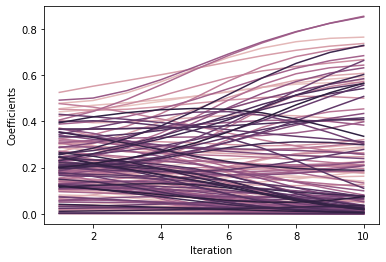

In [6]:
g = sns.lineplot(x="iteration", y="value", hue="variable", data=ev)
g.set(xlabel='Iteration', ylabel='Coefficients')
g.legend_.remove()

<AxesSubplot:>

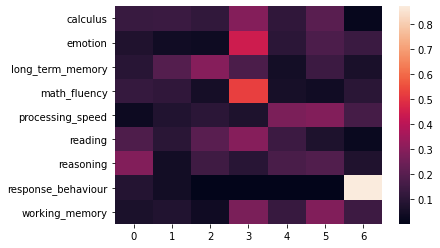

In [7]:
# Groups of tests
areas = {
    1: "calculus",
    2: "emotion",
    3: "long_term_memory",
    4: "math_fluency",
    5: "processing_speed",
    6: "reading",
    7: "reasoning",
    8: "response_behaviour",
    9: "working_memory"
}
eta.index = areas.values()
sns.heatmap(eta)

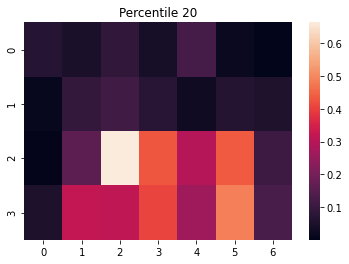

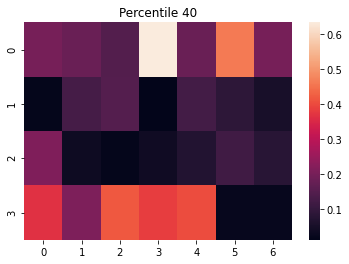

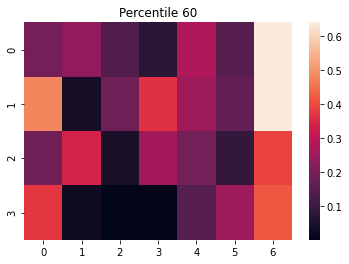

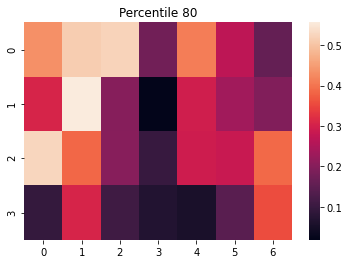

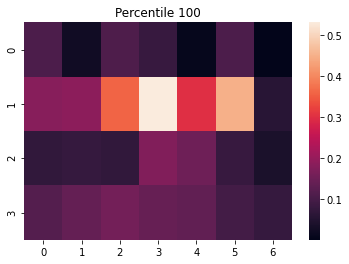

In [16]:
# Probability distributions
prs.keys() = 
for i, prs in s_prs.items():
    ax = plt.axes()
    sns.heatmap(prs, ax = ax)

    ax.set_title(f"Percentile {i * 20}")
    plt.show()

<AxesSubplot:>

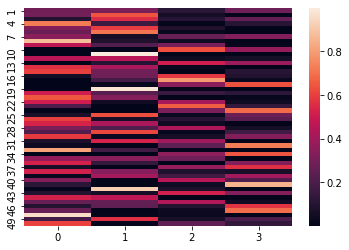

In [8]:
# Observations belonging to groups
sns.heatmap(theta.iloc[:50, :])

          0         1         2         3
0  0.066400  0.013144  0.003394  0.050678
1  0.045470  0.090993  0.160746  0.318630
2  0.087653  0.113193  0.663773  0.313537
3  0.039766  0.072828  0.428748  0.406698
4  0.121293  0.027954  0.296174  0.263271
5  0.017005  0.064044  0.433717  0.487002
6  0.000360  0.053913  0.104474  0.128483


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).

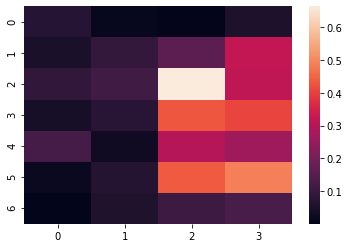

In [51]:
# Let's try to understand the four groups better
df = pd.concat(s_prs, axis=0).swaplevel()

for i in s_prs.keys():
    temp = df[df.index.isin([i], level=0)].droplevel(0).transpose()
    print(temp)
    ax = plt.axes()
    sns.heatmap(temp, ax = ax)
    ax.set_xticklabels([f"Percentile {(a + 1) * 20}" for a in range(len(s_prs.keys()))])
    plt.xticks(rotation=45)

    ax.set_title(f"User group {i}")
    plt.show()

In [26]:
d = { k: v.set_index(k, append=True) for k, v in s_prs.items()}

df = pd.concat(d, axis=1)
df.columns = df.columns.droplevel(-1) 

In [29]:
for i, prs in s_prs.items():
    prs["rating"] = i

In [41]:
df = pd.concat(s_prs, axis=0).swaplevel()

In [48]:
df[df.index.isin([0], level=0)].droplevel(0).transpose()

,1,2,3,4,5
0,0.066400,0.199917,0.192100,0.434236,0.107348
1,0.045470,0.181721,0.234649,0.512563,0.025598
2,0.087653,0.146706,0.134236,0.522299,0.109107
3,0.039766,0.634730,0.071937,0.175997,0.077570
4,0.121293,0.180814,0.278552,0.410822,0.008518
5,0.017005,0.460124,0.145753,0.269273,0.107845
6,0.000360,0.200956,0.639222,0.158570,0.000892


In [52]:
df

0         1         2         3         4         5         6
1 0  0.066400  0.045470  0.087653  0.039766  0.121293  0.017005  0.000360
  1  0.013144  0.090993  0.113193  0.072828  0.027954  0.064044  0.053913
  2  0.003394  0.160746  0.663773  0.428748  0.296174  0.433717  0.104474
  3  0.050678  0.318630  0.313537  0.406698  0.263271  0.487002  0.128483
2 0  0.199917  0.181721  0.146706  0.634730  0.180814  0.460124  0.200956
  1  0.017496  0.126303  0.149704  0.012210  0.122306  0.086715  0.052732
  2  0.213051  0.036295  0.017695  0.037343  0.070424  0.117046  0.078069
  3  0.366957  0.210360  0.417133  0.383075  0.401311  0.022343  0.022339
3 0  0.192100  0.234649  0.134236  0.071937  0.278552  0.145753  0.639222
  1  0.480433  0.037857  0.180729  0.365936  0.254091  0.167630  0.641318
  2  0.188022  0.340671  0.045799  0.262956  0.191011  0.086311  0.389700
  3  0.371660  0.026591  0.003150  0.001228  0.146131  0.252566  0.416612
4 0  0.434236  0.512563  0.522299  0.175997  0.410822  0.269273  0.158570
  1  0.306301  0.556478  0.199292  0.018499  0.295206  0.232861  0.193805
  2  0.526193  0.385069  0.202782  0.097966  0.291595  0.285247  0.387681
  3  0.093688  0.305829  0.108101  0.068905  0.054987  0.142723  0.355644
5 0  0.107348  0.025598  0.109107  0.077570  0.008518  0.107845  0.000892
  1  0.182626  0.188369  0.357082  0.530527  0.300443  0.448751  0.058232
  2  0.069341  0.077219  0.069951  0.172988  0.150796  0.077679  0.040077
  3  0.117016  0.138589  0.158080  0.140094  0.134300  0.095366  0.076923

coses a fer:
- mirar que les normalitzacions estiguin bé
- venetian blinds test set i accuracy com déu mana
- trobar millors k i l
- 5-fold CV per calcular l'accuracy
- random forest per comparar: tant amb valors reals com amb percentils
- percentil real vs predit per prova

- mirar doctorat industrial

In [ ]:
# Output stuff
deta.to_csv("eta.csv")
dtheta.to_csv("theta.csv")
for i in range(prs.shape[2]):
    pd.DataFrame(prs[:, :, i]).to_csv(f"prs_{i}.csv")

In [50]:
len(s_prs.keys())

5